# Airbnb短租数据集分析

现今社会，共享成为一种新的模式，在有限增加边际成本的前提下，提高了资源利用效率。短租作为共享空间的一种模式，越来越多的共享发生在陌生人之间。

随着数据技术的运用，信息也成为宝贵的资产，本次将从短租的数据里挖掘有趣的信息，分析短租模式下的房间、订单、租金的关系。

本次数据为Airbnb官方提供的北京市短租信息。
> 数据来源: [Airbnb 网站的公开信息](http://insideairbnb.com/get-the-data.html)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

In [2]:
# read data

listings = pd.read_csv('./listings.csv',encoding='utf8')
revirews = pd.read_csv('./reviews.csv')
listings.info()
print('\n- - - - - - - - -\n')
revirews.info()

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31457 entries, 0 to 31456
Data columns (total 16 columns):
id                                31457 non-null int64
name                              31456 non-null object
host_id                           31457 non-null int64
host_name                         31456 non-null object
neighbourhood_group               0 non-null float64
neighbourhood                     31457 non-null object
latitude                          31457 non-null float64
longitude                         31457 non-null float64
room_type                         31457 non-null object
price                             31457 non-null int64
minimum_nights                    31457 non-null int64
number_of_reviews                 31457 non-null int64
last_review                       18988 non-null object
reviews_per_month                 18988 non-null float64
calculated_host_listings_count    31457 non-null int64
availability_365                  31457 non-null int64
dt

## 数据说明

使用到的数据：
### listings.csv
房源基础信息

id -> 房屋编号

name -> 入住日期

neighbourhood -> 房屋所在行政区

room_type -> 房屋类型

price -> 价格

room_type -> 房间类型

### reviews.csv
汇总版评论数据

listing_id -> 房屋编号

date -> 入住日期

Text(0.5, 1.0, '行政区与短租房价格')

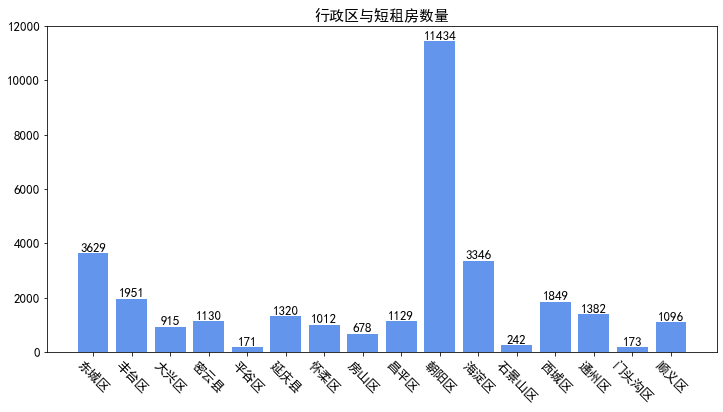

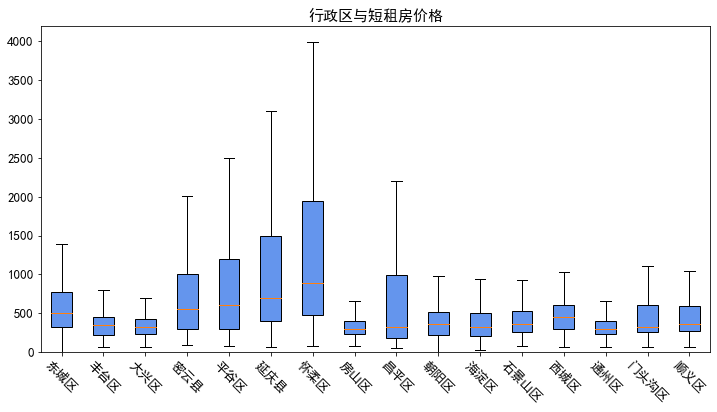

In [3]:
# 行政区与房间数量
areas_count = listings['neighbourhood'].groupby(listings['neighbourhood']).count()
new_areas_index = []
# 命名统一
for index in areas_count.index:
    new_areas_index.append(re.sub(r' \/ \w+',r'',index))
areas_count.index = new_areas_index

# 行政区与出租价格
prices = listings['price'].groupby(listings['neighbourhood'])
new_prices_index = []
prices_data = []
for title,data in prices:
    new_prices_index.append(re.sub(r' \/ \w+',r'',title))
    prices_data.append(data)
    
plt.figure(figsize=(12,6))
plt.bar(areas_count.index,areas_count.values,color='cornflowerblue')
plt.xticks(fontsize=13,rotation=-45)
plt.yticks(fontsize=13)
for k,v in zip(areas_count.index,areas_count):
    plt.text(k,v,'%d' % v,ha='center',va='bottom',fontsize=13)
plt.title('行政区与短租房数量',fontsize=15)
    
plt.figure(figsize=(12,6))
plt.boxplot(prices_data,labels=new_prices_index,patch_artist=True,showfliers=False,boxprops=dict(facecolor='cornflowerblue'))
plt.xticks(fontsize=13,rotation=-45)
plt.yticks(fontsize=13)
plt.ylim(0,4200)
plt.title('行政区与短租房价格',fontsize=15)

## 行政区与短租房数量、价格关系

从图中可知短租房绝大部分分布于市区之中，短租房数量最多的是朝阳区，租房数量远远高于其他行政区；接下来的是东城区、海淀区、西城区，考虑到东城区、西城区面积较小，相较之下，短租屋分布密度依然很高。

而郊区中短租房的数量，只占到较少的一部分。其中数量较多的区，是与市区相连的丰台区、通州区、昌平区。

在处理行政区与短租房价格关系的时候，因所分析数据中，并未有与价格相关性的数据，而成本、面积大小、服务、装修等因素均能很大程度影响短租房的定价，并且定价也是没有固定标准的；对此考虑到所以发布的价格通常也带有很强的不确定性，所以选择了箱线图进行粗略表示，并且过滤了其中的异常点，大体反映出短租房价格关系。

在价格图表中，在数量上占多数的朝阳区、东城区、西城区和海淀区的租金不高，集中在500元附近，总体低于1000元。而郊区的箱线图反映出来短租房的租金却高于市区，中位数超过500元，而且第三四分位数也有超过1000元，考虑其原因可能是地处于风景地带、或者是房间面积较大，这样使得该区租金有更高的定价。

Text(0.5, 1.0, '各月订单比例')

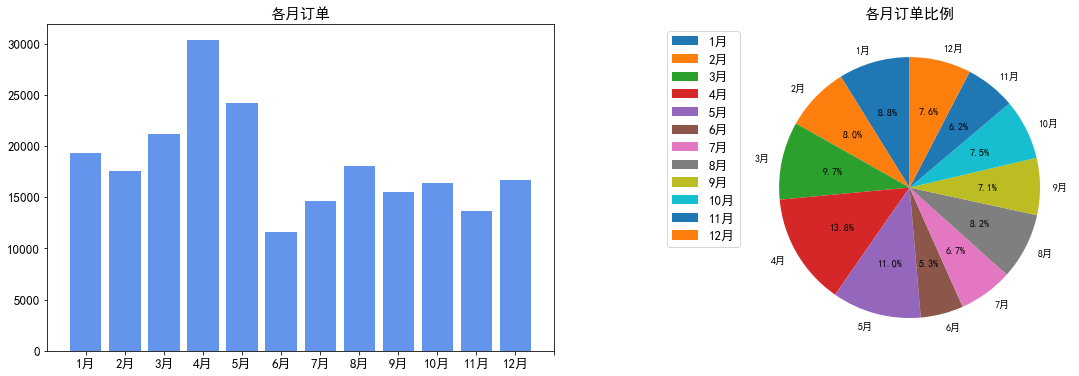

In [4]:
# 月份和订单数量
mouth_data = {}
for date in revirews['date']:
    mouth_search = re.search('\/(\d+)\/',date)
    mouth = mouth_search.group(1)
    if mouth in mouth_data:
        mouth_data[mouth] += 1
    else:
        mouth_data[mouth] = 1

mouths = pd.Series(mouth_data)
mouths.index = mouths.index.astype(int)
mouths = mouths.sort_index()
new_mouths_index = list(map(lambda x:"{:d}月".format(x),mouths.index))

plt.figure(figsize=(20,6))
plt.subplot(121)
plt.bar(new_mouths_index,mouths.values,color='cornflowerblue')
plt.xticks(np.arange(0,13,1.0),fontsize=13)
plt.yticks(fontsize=13)
plt.title('各月订单',fontsize=15)

plt.subplot(122)
pieplot,text1,text2 = plt.pie(mouths.values,labels=new_mouths_index,autopct='%.1f%%',shadow = False,startangle =90)
for t in text1:
    t.set_size=(13)
for t in text2:
    t.set_size=(13)
plt.legend(bbox_to_anchor=(0,1),fontsize=13)
plt.title('各月订单比例',fontsize=15)

## 月份和订单数量

如图所示，订单量最多的是4月份占总体订单量的13.6%，订单量最低的是6月占总体订单量的5.3%；上半年订单量平均多余下半年。

其中，上半年小长假较多，而下半年只有中秋节和国庆节。而4月份的清明节是春节过后的第一个节假日，考虑到大家在春节回家探亲，故而清明节出行选择出游的概率大过回家探亲；其次订单量第二多的5月份也有五一小长假的人流高峰；而订单最少的6月份，可能受5月的假期和7月的暑假影响；其余月份总体订单数差差距较小。

Text(0.5, 1.0, '短租房类型与价格')

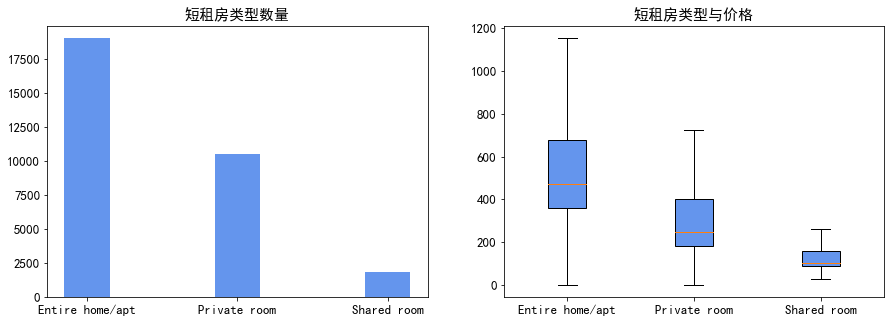

In [5]:
# 房间类型与价格关系
room_type_count = listings['room_type'].groupby(listings['room_type']).count()
room_prices =listings['price'].groupby(listings['room_type'])

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.bar(room_type_count.index,room_type_count.values,width=0.3,color='cornflowerblue')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('短租房类型数量',fontsize=15)

new_room_prices_index = []
room_prices_data = []
for title,data in room_prices:
    new_room_prices_index.append(title)
    room_prices_data.append(data.sort_values())

plt.subplot(122)
plt.boxplot(room_prices_data,labels=new_room_prices_index,patch_artist=True,showfliers=False,boxprops=dict(facecolor='cornflowerblue'))
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('短租房类型与价格',fontsize=15)

## 短租房类型与价格关系

本次数据中，短租房分为3种类，	整个房源（Entire home/apt，独享整个房源，无需与房东或他人共住）、独立房间（Private room，有自己的独立房间，与他人共享客厅等空间）、合住房间（Shared room，入住合用空间，例如公共休息室）。

其中，整个房源类型数量最多，平均价格最贵；独立房间其次；合住房间数量最少，平均价格最低。

可见，整租房的需求是最多的，独立房间较有性价比（有一定数量、价格趋中、且有一定的独立空间），而合住房间需求量较低。

group
30     17026
60      1355
90       346
120      146
150       55
180       36
210       16
240        4
270        2
300        1
360        1
Name: count, dtype: int64


Text(0.5, 1.0, '订单次数与价格关系')

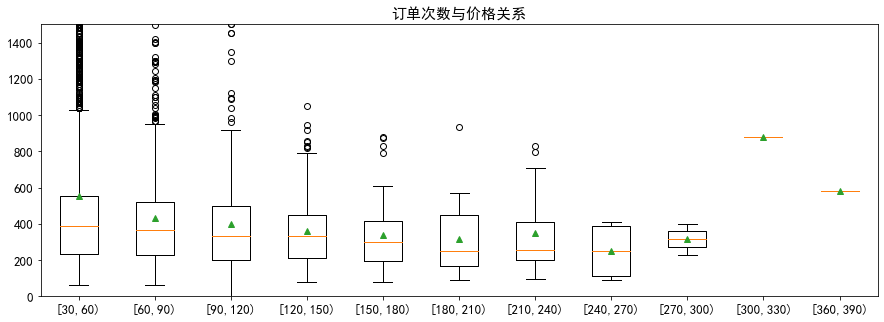

In [6]:
# 订单次数和房价的关系
def get_count_group(count,lim = 30):
    return lim*int(count//lim) + lim
    
id_counts = revirews['listing_id'].groupby(revirews['listing_id']).count()
id_prices = listings['price'].dropna().groupby(listings['id'])

cdata = {'id':[],'price':[],'count':[]}
for index,data in id_prices:
    if index in id_counts:
        cdata['count'].append(id_counts[index])
        cdata['id'].append(index)
        cdata['price'].append(data)

price_count = pd.DataFrame(data=cdata)
price_count.sort_values('count')
price_count['group'] = price_count['count'].apply(get_count_group)
price_count['price'] = price_count['price'].astype(int)
count_data = price_count['count'].groupby(price_count['group']).count()
print(count_data)

price_data = price_count['price'].groupby(price_count['group'])
cp_index = []
cpdata = []
for title,data in price_data:
    new_title = '[{0},{1})'.format(title,title+30)
    cp_index.append(new_title)
    cpdata.append(data.sort_values())

plt.figure(figsize=(15,5))
plt.boxplot(cpdata,labels=cp_index,showmeans=True)
plt.ylim(0,1500)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('订单次数与价格关系',fontsize=15)

## 订单次数和房价的关系

本次统计了每间短租屋的订单次数，按30次为一组，分为订单数小于30，订单数小于60，以此类推，由于[300,330),[360,390),组数据只有一组，不具有统计意义，故暂不分析。

首先，各组的箱线图分布大致一样，中位数、平均数差距不大。订单次数较少的几组[30,60)，[60,90)，[90,120)，含有大量的离散值；而订单数量较多的几组[120,150)，[150,180)，[180,210)，[210,240)，离散值较少，整体更加收敛；而订单最多的[240,270)，[270,300)两组，则不含离散值。整体呈现出，订单数量越多，箱线图越收敛，有着更少的离散值。

由此可知，在租金在合理的定价区间内，有利于提高订单的数量，提高入住率。
